In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Lab 5

In [2]:
def trapezoid(f,a=0,b=1,n=60):
    x = (b-a) / n
    integration = f(a) + f(b)
    for i in range(1,n):
        k = a + i*x
        integration += 2 * f(k)
    integration = integration * x/2
    return integration

f = lambda x: math.exp(-(x**2))

print(trapezoid(f,0,1,60))

0.7468071011991205


Lab 6

In [3]:
def recursive_trapezoid(f, a=0, b=1, n=60):
    # f is the function  f(x)
    # a is the x=a, start point of the integration
    # b is the x=b, end point of the integration
    # n means 2^n trapezoid
    if n == 0:
        return (b-a)*(f(a)+f(b))/2
    else:
        h = (b-a)/(2**n)
        s = 0
        for i in range(1,2**(n-1)+1):
            s += f(a+(2*i-1)*h)
        return recursive_trapezoid(f,a,b,n-1)/2 + h*s
    
f = lambda x: math.exp(-(x**2))

print(recursive_trapezoid(f,0,1,5))

0.7467642546522943


In [4]:
def romberg(f,a,b,n):
    # f is the function f(x)
    # a is the x=a, start point of the integration
    # b is the x=b, end point of the integration
    # n means 2^n trapezoid
    R = [[0 for i in range(n+1)] for j in range(n+1)]
    R[0][0] = (b-a)*(f(a)+f(b))/2
    for i in range(1,n+1):
        h = (b-a)/(2**i)
        s = 0
        for j in range(1,2**(i-1)+1):
            s += f(a+(2*j-1)*h)
        R[i][0] = R[i-1][0]/2 + h*s
        for k in range(1,i+1):
            R[i][k] = R[i][k-1] + (R[i][k-1]-R[i-1][k-1])/(2**k-1)
    return R[n][n]

f = lambda x: math.exp(-(x**2))

print(romberg(f,0,1,5))

0.7468240952269003


In [5]:
def adaptive_simpson(f, a, b, eps, level, level_max):
    # f is the function f(x)
    # a is the x=a, start point of the integration
    # b is the x=b, end point of the integration
    # eps is the tolerance
    # level is the current level of recursion
    # level_max is the maximum level of recursion
    c = (a+b)/2
    h = (b-a)/6
    S = h*(f(a)+4*f(c)+f(b))
    if level < level_max:
        S1 = adaptive_simpson(f, a, c, eps/2, level+1, level_max)
        S2 = adaptive_simpson(f, c, b, eps/2, level+1, level_max)
        if abs(S1+S2-S) < 15*eps:
            return S1+S2+(S1+S2-S)/15
    return S


f = lambda x: math.exp(-(x**2))

print(adaptive_simpson(f,0,1,1e-4,1,7))

0.7467979962042666


Lab 7

In [6]:
def GaussianForwardElimination(A,b): #A,b are numpy array of size (n,n) and n for equation Ax=b
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    Aans = A.copy()
    bans = b.copy()
    
    for i in range(n-1):
        for j in range(i+1,n):
            m = Aans[j,i]/Aans[i,i]
            bans[j] = bans[j] - m*bans[i]
            for k in range(i,n):
                Aans[j,k] = Aans[j,k] - m*Aans[i,k]

    return Aans, bans

def GaussianBacksubstitution(A,b):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    x = np.zeros(n,dtype=np.float64)
    
    for i in range(n-1,-1,-1):
        x[i] = b[i]
        for j in range(i+1,n):
            x[i] = x[i] - A[i,j]*x[j]
        x[i] = x[i]/A[i,i]

    return x

def Problem1(A,b): 
    Aelem, belem = GaussianForwardElimination(A,b)
    x = GaussianBacksubstitution(Aelem,belem)
    return x

In [7]:
def GaussianSwapForwardElimination(A,b):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    Aans = A.copy()
    bans = b.copy()
    l = list(range(n))
    sl = np.abs(A).max(axis=1)

    for i in range(n-1):
        for j in range(i+1,n):
            m = Aans[j,i]/Aans[i,i]
            bans[j] = bans[j] - m*bans[i]
            for k in range(i,n):
                Aans[j,k] = Aans[j,k] - m*Aans[i,k]
        p = np.argmax(np.abs(Aans[i:,i])/sl[i:])
        if p != 0:
            Aans[[i,i+p]] = Aans[[i+p,i]]
            bans[[i,i+p]] = bans[[i+p,i]]
            l[i],l[i+p] = l[i+p],l[i]
            sl[i],sl[i+p] = sl[i+p],sl[i]

    return Aans, bans, l

def GaussianSwapBacksubstitution(A,b,l):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    x = np.zeros(n,dtype=np.float64)

    for i in range(n-1,-1,-1):
        x[i] = b[i]
        for j in range(i+1,n):
            x[i] = x[i] - A[i,j]*x[j]
        x[i] = x[i]/A[i,i]
    x = x[l]

    return x


def Problem2(A,b):
    Aselem,bselem,l = GaussianSwapForwardElimination(A,b)
    x = GaussianSwapBacksubstitution(Aselem,bselem,l)
    return x

In [8]:
def triband(a,d,c,b):
    n = len(d)
    assert len(a) == len(c) == n-1
    assert len(b) == n
    x = np.zeros_like(b)

    for i in range(1,n):
        m = a[i-1]/d[i-1]
        d[i] = d[i] - m*c[i-1]
        b[i] = b[i] - m*b[i-1]
        
    x[n-1] = b[n-1]/d[n-1]
    
    for i in range(n-2,-1,-1):
        x[i] = (b[i] - c[i]*x[i+1])/d[i]
        

    return x

def Problem3(a,d,c,b):
    return triband(a,d,c,b)

Lab 8

In [9]:
def LUdecomposition(A):
    m,n = A.shape
    U = A.copy()
    L = np.zeros_like(U)
    np.fill_diagonal(L, 1)

    #Your code here
    for k in range(n):
        for i in range(k+1,n):
            L[i,k] = U[i,k]/U[k,k]
            for j in range(k,n):
                U[i,j] = U[i,j] - L[i,k]*U[k,j]
    #End your code
    
    return L,U

# Calculae Lz=b
def Lsubstitution(L,b):
    m,n = L.shape

    z = np.zeros(n,dtype=np.float64)
    #Your Code Here
    for i in range(n):
        z[i] = b[i]
        for j in range(i):
            z[i] = z[i] - L[i,j]*z[j]
        z[i] = z[i]/L[i,i]
    #End Your code
    return z

# Calculate Ux = z
def GaussianBacksubstitution(A,b):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    x = np.zeros(n,dtype=np.float64)
    
    #Your Code Here
    for i in range(n-1,-1,-1):
        x[i] = b[i]
        for j in range(i+1,n):
            x[i] = x[i] - A[i,j]*x[j]
        x[i] = x[i]/A[i,i]
    #End Your code
    
    return x

def Problem1(A,b): 
    #Your code here.
    #1. Calculate A=LU. Given A is known, find L,U
    #2. Calculate Lz=b  Given L from 1., and b from the problem, find z
    #3. Calculate Ux=z  Given U from 1., and z from 2., find x
    L,U = LUdecomposition(A)
    z = Lsubstitution(L,b)
    x = GaussianBacksubstitution(U,z)
    return x


In [10]:
def Jacobi(A,b,kmax):
    n, = b.shape
    x = np.zeros_like(b)

    #Your code here
    for k in range(kmax):
        for i in range(n):
            x[i] = b[i]
            for j in range(n):
                if i != j:
                    x[i] = x[i] - A[i,j]*x[j]
            x[i] = x[i]/A[i,i]
    #end your code
    return x

def Problem2(A,b):
    return Jacobi(A,b,21)


Lab 9

Quadratic spline 

In [11]:
def Problem1(x, xi, yi):
    nx = len(xi)
    z = [0]
    q = list()
    for i in range(1, nx):
        q = (yi[i] - yi[i-1]) / (xi[i] - xi[i-1])
        z.append(-z[i-1] + 2 * q)
    eq_list = []
    ans = 0
    for i in range(nx - 1):
        a = 0.5 * (z[i+1] - z[i]) / (xi[i+1] - xi[i])
        b = -2 * a * xi[i] + z[i]
        c = a*xi[i]**2 - z[i] * xi[i] + yi[i]
        eq_list.append((a, b, c))
    for i in range(nx - 1):
        if xi[i] <= x <= xi[i+1]:
            ans = eq_list[i][0] * (x-xi[i])**2 + z[i]*(x-xi[i]) + yi[i]
            break
    return ans

t = (-4, 1, 2, 3, 5.0)
y = (1182, 2, 48, 272, 2262)
xtest = list(range(-4, 5))
ytesting = [Problem1(i, t, y) for i in xtest]
y_correct_ans = [1182.0, 1134.8, 993.2, 757.2, 426.7999999999, 2.0, 48.0, 272.0, 711.5]

print(all(list(map(lambda x, y: x-y < 1e-8, ytesting, y_correct_ans))))


t = (-1, 0, 0.5, 1, 2, 5/2)
y = (2, 1, 0, 1, 2, 3)
xtest = list(range(-1, 2))
ytesting = [Problem1(i, t, y) for i in xtest]
y_correct_ans = [757.2, 426.79999999999995, 2.0]
print(all(list(map(lambda x, y: x-y < 1e-8, ytesting, y_correct_ans))))


True
True


Natural Cubic Spline

In [12]:
def Jacobi(A, b, kmax=20):
    n, = b.shape
    x = np.zeros_like(b)

    # Your code here
    for k in range(kmax):
        for i in range(n):
            x[i] = b[i]
            for j in range(n):
                if i != j:
                    x[i] = x[i] - A[i, j]*x[j]
            x[i] = x[i]/A[i, i]
    # end your code
    return x


def Problem2(x, xi, yi):

    ti = np.array(xi)
    yi = np.array(yi)
    A = np.zeros((len(ti), len(ti)))

    A[0, 0] = 1
    A[-1, -1] = 1

    for i in range(1, len(ti)-1):
        A[i, i-1] = ti[i] - ti[i-1]
        A[i, i] = 2 * (ti[i+1] - ti[i-1])
        A[i, i+1] = ti[i+1] - ti[i]

    b = np.zeros(len(ti))
    b[1:-1] = 3 * (yi[2:] - yi[1:-1]) / (ti[2:] - ti[1:-1]) - \
        3 * (yi[1:-1] - yi[:-2]) / (ti[1:-1] - ti[:-2])
    z = Jacobi(A, b)
    eq_list = []
    ans = 0

    for i in range(len(ti) - 1):
        a = (z[i+1] - z[i]) / (3 * (ti[i+1] - ti[i]))
        b = z[i]
        c = (yi[i+1] - yi[i]) / (ti[i+1] - ti[i]) - \
            (2 * z[i] + z[i+1]) * (ti[i+1] - ti[i]) / 3
        d = yi[i]
        eq_list.append((a, b, c, d))

    for i in range(len(ti) - 1):
        if ti[i] <= x <= ti[i+1]:
            ans = eq_list[i][0] * (x-ti[i])**3 + eq_list[i][1] * \
                (x-ti[i])**2 + eq_list[i][2] * (x-ti[i]) + eq_list[i][3]
            break
    return ans

t = (-4, 1, 2, 3, 5.0)
y = (1182, 2, 48, 272, 2262)
xtest = list(range(-4, 5))
ytesting = [Problem2(i, t, y) for i in xtest]
y_correct_ans = [1182.0, 835.9733333333334, 517.4533333333334, 253.9466666666667, 72.96000000000001, 2.0, 48.0, 272.0, 1075.9833333333333]

print(all(list(map(lambda x, y: x-y < 1e-8, ytesting, y_correct_ans))))

t = (-1, 0, 1)
y = (1, 2, -1)
xtest = np.arange(-1, 1, 0.5)
ytesting = [Problem2(i, t, y) for i in xtest]
y_correct_ans = [1.0, 1.875, 2.0, 0.875]

print(all(list(map(lambda x, y: x-y < 1e-8, ytesting, y_correct_ans))))

True
True


ของอาจารย์

Lab 5

In [13]:
def richardson_diff(x,h=0.75,N=2):
    n = N+1
    func = lambda x:x**6
    table = np.zeros((n,n),dtype=np.float64)
    diff_ = lambda x,h: (func(x+h)-func(x-h))/(2*h)
    
    for i in range(n):
        table[i,0] = diff_(x,h)
        for j in range(1,i+1):
            table[i,j] = table[i,j-1] + (table[i,j-1]-table[i-1,j-1])/(4**j-1)
        h /= 2
    print(table)
    
    return table[n-1,n-1]

In [14]:
def trapezoid(f,a=0,b=1,n=60):
    h = (b-a)/n
    sum_ = 0.5*(f(a)+f(b))*h
    
    for i in range(1,n):
        x = a+i*h
        sum_ += f(x)*h
    
    return(sum_)

Lab 6

In [15]:
def recursive_trapezoid(f,a,b,n):
    r = np.zeros((n+1,),dtype=np.float64)
    h = (b-a)/2
    r[0] = h*(f(a)+f(b))
    print(r[0],h)
    
    for i in range(1,n+1):
        h = (b-a)/2**i
        r[i] = r[i-1]/2 + h*sum([f(a+(2*k-1)*h) for k in range(1,2**(i-1)+1)])
        print(r[i],h)
    return r[n]

In [16]:
def romberg(f,a,b,n):
    table=np.zeros((n,n),dtype=np.float64)
    h = b-a
    table[0][0] = h/2*(f(a)+f(b))
    for i in range(1,n):
        h /= 2
        sk = sum(f(a+k*h) for k in range(1,2**i,2))
        table[i,0] = 0.5*table[i-1,0]+sk*h
        for j in range(1,i+1):
            table[i,j] = table[i,j-1]+(table[i,j-1]-table[i-1,j-1])/(4**j-1)
    print(table)
    return table[n-1][n-1]

In [17]:
def adaptive_simpson(f,a,b,eps,level, level_max):
    level += 1
    print(level)
    h = b-a
    c = (a+b)/2
    one_simpson = h/6*(f(a)+4*f(c)+f(b))
    d = (a+c)/2
    e = (c+b)/2
    two_simpson = h/12*(f(a)+4*f(d)+2*f(c)+4*f(e)+f(b))
    if level > level_max:
        return "Max level reached"
    else:
        if abs(two_simpson - one_simpson) < 15*eps:
            return two_simpson + (two_simpson-one_simpson)/15
        else:
            left_simpson = recursive_simpson(f,a,c,eps/2,level, level_max)
            right_simpson = recursive_simpson(f,c,b,eps/2,level, level_max)
            return left_simpson + right_simpson

Lab 7

In [18]:
def GaussianForwardElimination(A,b):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    Aans = A.copy()
    bans = b.copy()
    
    for k in range(n-1):
        print('pivot no:',k)
        for i in range(k+1,n):
            Qi =Aans[i][k]/Aans[k][k]
            for j in range(k,n):
                Aans[i][j] -= Qi*Aans[k][j]
            bans[i] -= Qi*bans[k]
    return Aans,bans

def GaussianBacksubstitution(A,b):
    m,n= A.shape
    bn, = b.shape
    assert n==m==bn
    x = np.zeros(n,dtype=np.float64)
    x[n-1] = b[n-1]/A[n-1][n-1]
    print(n-1,x[n-1])
    for i in range(n-2,-1,-1):
        sum_ = b[i]
        for j in range(i,n):
            print(i,j,A[i][j],x[j])
            sum_ -= A[i][j]*x[j]
        x[i] = sum_/A[i][i]
        print(x)
    return x

def Problem1(A,b):
    Aelem, belem = GaussianForwardElimination(A,b)
    x = GaussianBacksubstitution(Aelem,belem)
    return x

In [19]:
def GaussianSwapForwardElimination(A,b):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    Aans = A.copy()
    bans = b.copy()
    
    l = list(range(n))
    sl = np.abs(A).max(axis=1)
    
    def find_maxrow(A,l,stepnum):
        ln = len(l)
        if stepnum >= ln-2:
            return
        print([abs(A[i][stepnum]) for i in range(stepnum,ln)],[sl[l[i]] for i in range(stepnum,ln)])
        r = np.array([abs(A[i][stepnum])/sl[l[i]] for i in range(stepnum,ln)])
        j = r.argmax()+stepnum
        print(A,l)
        l[stepnum] = l[j]
        l[j] = stepnum
        print(sl,'r=',r,j,l)
    
    for k in range(n):
        print("============")
        find_maxrow(Aans,l,k)
        for i in range(k+1,n):
            Qi = Aans[l[i]][k]/Aans[l[k]][k]
            for j in range(k,n):
                Aans[l[i]][j] -= Qi*Aans[l[k]][j]
            bans[l[i]] -= Qi*bans[l[k]]
            print(bans)
    return Aans,bans,l

def GaussianSwapBacksubstitution(A,b,l):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    x = np.zeros(n,dtype=np.float64)
    x[n-1] = b[l[n-1]]/A[l[n-1]][n-1]
    print(n-1,x[n-1])
    for i in range(n-2,-1,-1):
        sum_ = b[l[i]]
        for j in range(i,n):
            print(i,j,A[l[i]][j],x[j])
            sum_ -= A[l[i]][j]*x[j]
        x[i] = sum_/A[l[i]][i]
        print(x)
    return x

def  Problem2(A,b):
    Aselem,bselem,l = GaussianSwapForwardElimination(A,b)
    x = GaussianSwapBacksubstitution(Aselem,bselem,l)
    return x

In [20]:
def triband(a,d,c,b):
    n = len(d)
    assert len(a) == len(c) == n-1
    assert len(b) == n
    x = np.zeros_like(b)
    
    for i in range(1,n):
        xmult = a[i-1]/d[i-1]
        d[i] -= xmujlt*c[i-1]
        b[i] -= xmujlt*b[i-1]
    
    x[n-1] = b[n-1]/d[n-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i]-c[i]*x[i+1])/d[i]
    return x

def Problem3(a,d,c,b):
    x = triband(a,d,c,b)
    return x

Lab 8

In [21]:
def LUdecomposition(A):
    m,n = A.shape

    U = A.copy()
    L = np.zeros_like(U)
    np.filldiagonal(L, 1)

    #Your code here
    for k in range(n-1): #pivot
        for i in range(k+1,n):
            Qi = U[i][k]/U[k][k]
            L[i][k] = Qi
            for j in range(k,n): 
                U[i][j] -= Qi*U[k][j] 

    #end Your code

    return L,U

# Calculae Lz=b
def Lsubstitution(L,b):
    m,n = L.shape

    z = np.zeros(n,dtype=np.float64)
    #Your Code Here
    z[0] = b[0]/L[0][0]
    for i in range(1,n):
        sum = b[i]
        for j in range(i):
            sum -=  L[i][j]*z[j]
        z[i] = sum/L[i][i]

    #End Your code
    return z

# Calculate Ux = z
def GaussianBacksubstitution(A,b):
    m,n = A.shape
    bn, = b.shape
    assert n==m==bn
    x = np.zeros(n,dtype=np.float64)

    #Your Code Here
    x[n-1] = b[n-1]/A[n-1][n-1]
    for i in range(n-2,-1,-1):
        sum = b[i]
        for j in range(i,n):
            print(i,j,A[i][j],x[j])
            sum -=  A[i][j]*x[j]
        x[i] = sum_/A[i][i]

    #End Your code
    return x

def Problem1(A,b): 
    #Your code here.
    #1. Calculate A=LU. Given A is known, find L,U
    L,U = LUdecomposition(A)
    #2. Calculate Lz=b  Given L from 1., and b from the problem, find z
    z = Lsubstitution(L,b)
    #3. Calculate Ux=z  Given U from 1., and z from 2., find x
    x = GaussianBacksubstitution(U,z)

    return x

In [22]:
def Jacobi(A,b,kmax):
    n, = b.shape
    x = np.zeros_like(b)

    #Your code here
    for k in range(kmax):
        xprev = x.copy()
        for i in range(n):
            ai = A[i][:].copy()
            aii = ai[i]
            ai[i] = 0
            x[i] = (b[i] - np.dot(ai,xprev))/aii

    #end your code
    return x


def Problem2(A,b):
    return Jacobi(A,b,21) 


In [23]:
def Problem1(x,xi,yi):
    #Quadratic Spline.
    nx = len(xi)
    ny = len(yi)
    assert nx == ny
    assert sorted(xi) == list(xi)
    z = []
    Q = []
    z.append(0)
    for ip1 in range(1,nx):
        z.append( -z[ip1-1]+2(yi[ip1] - yi[ip1-1])/(xi[ip1] - xi[ip1-1]))


    assert nx == len(z)

    iplus1=[ind for ind,val in enumerate(xi) if val>x][0]
    inow = iplus1-1

    a=0.5*(z[iplus1] - z[inow])/(xi[iplus1] - xi[inow])
    b= -2*xi[inow]*a + z[inow]
    c= a*xi[inow]**2 - z[inow] * xi[inow]+yi[inow]

    return  0.5*(z[iplus1] - z[inow])/(xi[iplus1] - xi[inow])*(x-xi[inow])*2 + z[inow]*(x-xi[inow])+yi[inow]

def test_1():
    t=(-4,1,2,3,5.0)
    y = (1182,2,48,272,2262)
    xtest = list(range(-4,5))
    ytesting = [Problem1(i,t,y) for i in xtest ]
    y_correct_ans = [1182.0, 1134.8, 993.2, 757.2, 426.7999999999, 2.0, 48.0, 272.0, 711.5]
    assert all(list(map(lambda x,y: abs(x-y)<1e-8, ytesting,y_correct_ans)))


def test_2():
    t=(-1,0,0.5,1,2,5/2)
    y = (2,1,0,1,2,3)
    xtest = list(range(-1,2))
    ytesting = [Problem1(i,t,y) for i in xtest ]
    y_correct_ans = [2,1,1]
    assert all(list(map(lambda x,y: abs(x-y)<1e-8, ytesting,y_correct_ans)))

<>:11: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:11: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\porpu\AppData\Local\Temp\ipykernel_11672\1193121827.py:11: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  z.append( -z[ip1-1]+2(yi[ip1] - yi[ip1-1])/(xi[ip1] - xi[ip1-1]))


In [24]:
def triband(a,d,c,b):
    n = len(d)
    assert len(a) == len(c) == n-1
    assert len(b) == n

    x = np.zeros_like(b)

    for i in range(1,n):
        xmult = a[i-1]/d[i-1]
        d[i] -= xmultc[i-1]
        b[i] -= xmultb[i-1]

    x[n-1] = b[n-1]/d[n-1] 
    for i in range(n-2,-1,-1):
        x[i] = (b[i] - c[i]*x[i+1])/d[i]
    return x



def Problem2(x,xi,yi):
    #Natural Cubic Spline
    nx = len(xi)
    ny = len(yi)
    assert nx == ny
    assert sorted(xi) == list(xi)
    n=nx-1

    h = [xi[i+1] - xi[i] for i in range(n)]#n
    b = [(yi[i+1] - yi[i])/h[i] for i in range(n)]#n
    btriband = [6(b[i] - b[i-1]) for i in range(1,n)]#n-2
    htriband = h[1:n-1].copy()#n-2
    dtriband = [2(h[i]+h[i+1]) for i in range(n-1)]#n-1
    ztriband = triband(htriband,dtriband,htriband,btriband)

    z = [0]+ztriband.tolist() +[0]
    assert nx == len(z)
    iplus1=[ind for ind,val in enumerate(xi) if val>x][0]
    inow = iplus1-1

def cubic_spline(xi,yi,z,x):
    i = find_nearest(xi, x)
    iplus1 = i + 1
    inow = i
    if x < xi[i]:
        inow = i - 1
    if x > xi[iplus1]:
        inow = i + 1
        iplus1 = i + 2
    h = xi[iplus1]-xi[inow]
    return z[iplus1]/(6*h)*(x - xi[inow])**3 - z[inow]/(6*h)*(x - xi[iplus1])**3+(yi[iplus1]/h- h/6*z[iplus1])*(x - xi[inow])-(yi[inow]/h - h/6*z[inow])*(x - xi[iplus1])

<>:30: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:32: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:30: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:32: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\porpu\AppData\Local\Temp\ipykernel_11672\3739068280.py:30: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  btriband = [6(b[i] - b[i-1]) for i in range(1,n)]#n-2
C:\Users\porpu\AppData\Local\Temp\ipykernel_11672\3739068280.py:32: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  dtriband = [2(h[i]+h[i+1]) for i in range(n-1)]#n-1


In [25]:
def test_1():
    t=(-4,1,2,3,5.0)
    y = (1182,2,48,272,2262)
    xtest = list(range(-4,5))
    ytesting = [Problem2(i,t,y) for i in xtest ]
    y_correct_ans = [1182.0, 835.9733333333334, 517.4533333333334, 253.9466666666667, 72.96000000000001, 2.0, 48.0, 272.0, 1075.9833333333333]
    assert all(list(map(lambda x,y: abs(x-y)<1e-8, ytesting,y_correct_ans)))


def test_2():
    t=(-1,0,1)
    y= (1,2,-1)
    xtest = np.arange(-1,1,0.5)
    ytesting = [Problem2(i,t,y) for i in xtest ]
    y_correct_ans = [1.0, 1.875, 2.0, 0.875]
    assert all(list(map(lambda x,y: abs(x-y)<1e-8, ytesting,y_correct_ans)))

Lab 10

Euler_ex_ipy

In [26]:
def Euler(tstart,xstart,tstop,total_steps,f_tx):
    x = xstart
    t = tstart
    h= (tstop - tstart)/total_steps

    t_array = []
    x_array = []
    x_array.append(x)
    t_array.append(t)
    for i in range(total_steps):
        #print(i,x,t)
        x += h* f_tx(t,x)
        t += h
        x_array.append(x)
        t_array.append(t)
    return x_array,t_array,x


In [27]:
f_tx = lambda t,x: 1+x**2+t**3
tstart = 1
tstop = 2
xstart = -4
totalsteps = 100
x_array,t_array,xstop = Euler(tstart,xstart,tstop,totalsteps,f_tx)

print('x{}={}'.format(tstop,xstop))


x2=4.235863694432819


In [28]:
f_tx = lambda t,x: x
tstart = 0
tstop = 2
xstart = 1
totalsteps = 100
x_array,t_array,xstop = Euler(tstart,xstart,tstop,totalsteps,f_tx)
print('x{}={}'.format(tstop,xstop))


x2=7.244646118252337


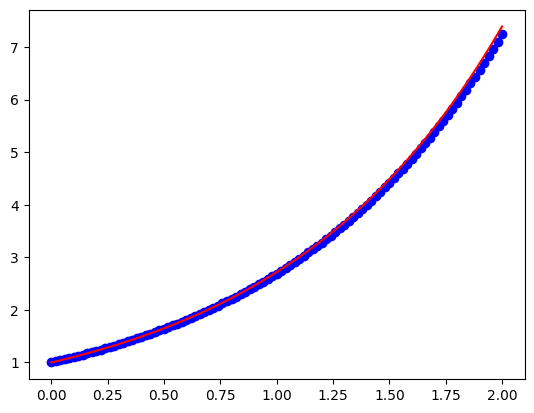

In [29]:
exact_x = np.exp(t_array,dtype=np.float64)
xp = np.array(x_array)
tp = np.array(t_array)
plt.plot(tp, xp, 'bo')
plt.plot(tp, exact_x, 'red')
plt.show()

RungeKutta_prob1_ipy

In [30]:
def RK2(tstart,xstart,tstop,total_steps,f_tx):
    x = xstart
    t = tstart
    h= (tstop - tstart)/total_steps

    t_array = []
    x_array = []
    x_prime1_array = []
    x_array.append(x)
    t_array.append(t)
    x_prime1_array.append(f_tx(t,x))
    for i in range(total_steps):
        k1 = h*f_tx(t,x)
        k2 = h*f_tx(t+h, x+k1)
        x += (k1+k2)/2
        t = tstart + (i+1)*h
        x_array.append(x)
        t_array.append(t)
        x_prime1_array.append(f_tx(t,x))
    return x_array,x_prime1_array,t_array, x

In [31]:
f_tx1_ = lambda t,x: 2+(x-t-1)**2
xstart = 2
tstart = 1
tstop = 1.5625
totalsteps = 172
x_array,x_prime1_array,t_array, xstop = RK2(tstart,xstart,tstop,totalsteps,f_tx1_)
print(xstop)

3.1929385640256536


In [32]:
def RK4(tstart,xstart,tstop,total_steps,f_tx):
    x = xstart
    t = tstart
    h= (tstop - tstart)/total_steps
    print('h',h)
    t_array = []
    x_array = []
    x_prime1_array = []
    for i in range(total_steps):
        k1 = h*f_tx(t,x)
        k2 = h*f_tx(t+0.5*h, x+0.5*k1)
        k3 = h*f_tx(t+0.5*h, x+0.5*k2)
        k4 = h*f_tx(t+h, x+k3)
        x_array.append(x)
        t_array.append(t)
        x_prime1_array.append(f_tx(t,x))
        x += (k1+2*k2+2*k3+k4)/6
        t = tstart + (i+1)*h
    return x_array,x_prime1_array,t_array, x

In [33]:
f_tx2= lambda t,x: 2+(x-t-1)**2
xstart = 2
tstart = 1
tstop = 1.5625
totalsteps =72
x_array,x_prime1_array,t_array, xstop = RK4(tstart,xstart,tstop,totalsteps,f_tx2)
print(xstop)

h 0.0078125
3.192937673837072


f_tx1 = lambda t,x: x + x**2
K1 = lambda t,x,h : h*f_tx1(t,x)
K2 = lambda t,x,h : h*f_tx1(t+0.5*h, x+0.5* K1(t,x,h))
K3 = lambda t,x,h : h*f_tx1(t+0.5*h, x+0.5* K2(t,x,h))
K4 = lambda t,x,h : h*f_tx1(t+h, x+K3(t,x,h))




x = 0.20466341728915526943
a = 1
b = 2.77
t = a
h= 0.01
total_steps = int((b - a)/h)
x_array = []
t_array = []
x_prime1_array = []

for i in range(total_steps):

    k1 = K1(t,x,h)
    k2 = K2(t,x,h)
    k3 = K3(t,x,h)
    k4 = K4(t,x,h)
    x_array.append(x)
    t_array.append(t)
    x_prime1_array.append(f_tx1(t,x))
    x += (k1+2*k2+2*k3+k4)/6
    t += h


    print(i,t,x)

print(t,x)



import math
f_tx1_ = lambda t,x:-2*x+ math.exp(-2*t)*t**3
xstart = 1
tstart = 0
print(f_tx1_(0,1))
print(f_tx1_(0.05,0.9))
tstop = 0.2
totalsteps = 2
x_array,x_prime1_array,t_array, xstop = RK4(tstart,xstart,tstop,totalsteps,f_tx1_)
print(xstop)

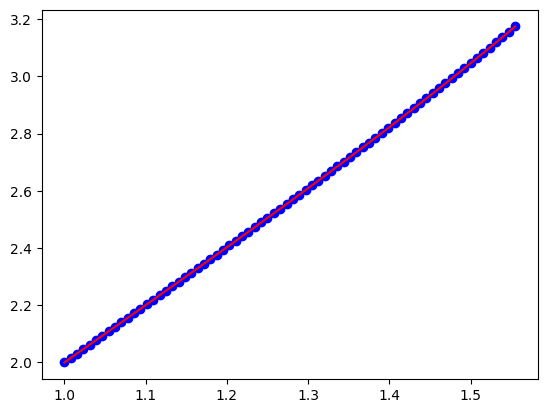

In [34]:
x = np.array(x_array)
t = np.array(t_array)
x_prime = np.array(x_prime1_array)

exact_x = 1 + t + np.tan(t-1)
#et = np.exp(t,dtype=np.float64)
#et_minus_16_negative = 16-et
#e2t =  np.exp(2*t,dtype=np.float64)
#exact_x = np.divide(et,et_minus_16_negative)
plt.plot(t, x, 'bo')
plt.plot(t, exact_x, 'red')
plt.show()

System_firstorder_RungeKutta_ipy

รูปในไฟย์ข้างๆ

In [35]:
def RK4System(tstart,xystart,tstop,total_steps,f_tx): 
    K1 = lambda t,x : f_tx(t,x)
    K2 = lambda t,x,h : f_tx(t+0.5*h, x+0.5*h* K1(t,x))
    K3 = lambda t,x,h : f_tx(t+0.5*h, x+0.5*h* K2(t,x,h))
    K4 = lambda t,x,h : f_tx(t+h, x+h*K3(t,x,h))
    x_array = []
    y_array = []
    t_array = []
    x_prime1_array = []
    y_prime1_array = []
    xy = xystart
    t = tstart
    h= (tstop - tstart)/total_steps
    for i in range(total_steps):
        k1 = K1(t,xy)
        k2 = K2(t,xy,h)
        k3 = K3(t,xy,h)
        k4 = K4(t,xy,h)    
        xy += h/6*(k1+2*k2+2*k3+k4)
        t += h
        x_array.append(xy[0])
        y_array.append(xy[1])
        t_array.append(t)
        x_prime1_array.append(k1[0])
        y_prime1_array.append(k1[1])
        print(i,t,xy)

    return t_array,x_array,y_array,x_prime1_array,y_prime1_array,xy


In [36]:
f_tx1 = lambda t,x: np.array([x[0] - x[1] +2*t -t**2 -t**3, x[0] + x[1] -4*t**2 + t**3],dtype=np.float64)  #x must be a numpy array
xstart = 1
ystart = 0
tstart = 0
tstop=1
total_steps=200
xystart = np.array([xstart,ystart],dtype=np.float64)
t_array,x_array,y_array,x_prime1_array,y_prime1_array,xy = RK4System(tstart,xystart,tstop,total_steps,f_tx1)
print(xy)

0 0.005 [1.00502496 0.00502492]
1 0.01 [1.01009966 0.01009933]
2 0.015 [1.01522387 0.01522275]
3 0.02 [1.02039731 0.02039467]
4 0.025 [1.02561973 0.02561458]
5 0.030000000000000002 [1.03089086 0.030882  ]
6 0.035 [1.03621046 0.03619641]
7 0.04 [1.04157824 0.04155733]
8 0.045 [1.04699394 0.04696424]
9 0.049999999999999996 [1.05245728 0.05241666]
10 0.05499999999999999 [1.057968   0.05791407]
11 0.05999999999999999 [1.06352581 0.06345597]
12 0.06499999999999999 [1.06913044 0.06904188]
13 0.06999999999999999 [1.07478161 0.07467128]
14 0.075 [1.08047902 0.08034367]
15 0.08 [1.0862224  0.08605855]
16 0.085 [1.09201144 0.09181543]
17 0.09000000000000001 [1.09784587 0.0976138 ]
18 0.09500000000000001 [1.10372538 0.10345315]
19 0.10000000000000002 [1.10964967 0.10933299]
20 0.10500000000000002 [1.11561844 0.11525281]
21 0.11000000000000003 [1.1216314  0.12121211]
22 0.11500000000000003 [1.12768822 0.12721039]
23 0.12000000000000004 [1.13378861 0.13324714]
24 0.12500000000000003 [1.13993225 0.1

In [37]:
# TODO verify the answer with Analytical solution


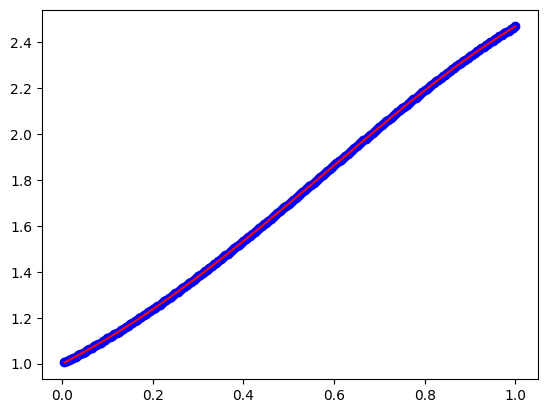

In [38]:
x = np.array(x_array)
y = np.array(y_array)
t = np.array(t_array)
x_prime = np.array(x_prime1_array)
y_prime = np.array(y_prime1_array)

et = np.exp(t,dtype=np.float64)
cost = np.cos(t)
sint = np.sin(t)
tsq = np.multiply(t,t)
tcube = np.multiply(tsq,t)
exact_x = np.multiply(et,cost) + tsq
exact_y = np.multiply(et,sint) - tcube
plt.plot(t, x, 'bo')
plt.plot(t, exact_x, 'red')
plt.show()

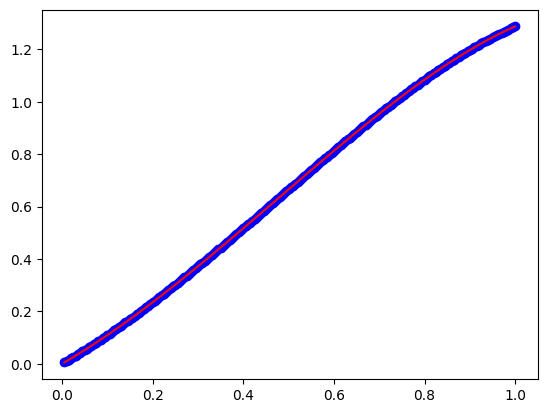

In [39]:
plt.plot(t, y, 'bo')
plt.plot(t, exact_y, 'red')
plt.show()

In [40]:
# TODO calculate error big O